In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import scipy.io.wavfile as wav

import timeit

testcode1 = '''
def pedagogical_dft(x, N):
 # array holding the real parts of the spectrum
    Xre = np.zeros(N)
    Xim = np.zeros(N)
 # array holding the imaginary values of the spectru Xim = np.zeros(N)
    for k in np.arange(0,N):
         for t in np.arange(0,N):
   #inner product with real basis k
            Xre[k] += x[t]*np.cos(t*k*2*np.pi/N) 
   #inner product with imaginary basis k
            Xim[k] += x[t]*np.sin(t*k*2*np.pi/N) 
    return (Xre, Xim)

'''
def test1(): 
    x = np.zeros(512)
    print (timeit.repeat(stmt=testcode1, repeat=10))

test1()

[0.06920599800000016, 0.05735753900000029, 0.05683082000000006, 0.05791620700000033, 0.05668679699999979, 0.05727681000000029, 0.054900559000000015, 0.054990114000000645, 0.05451274700000042, 0.052833679999999994]


In [2]:
# Modified version of the pedagogical DFT
testcode2 = '''

def efficient_dft(x, N):
    
    X_re = np.zeros(N)
    X_im = np.zeros(N)
    
    for k in np.arange(0,N):
        omega = 2*k*np.pi/N
        for t in np.arange(0,N):
            
            X_re[k] += x[t]*np.cos(t*omega)
            X_im[k] += x[t]*np.sin(t*omega)

    return (X_re, X_im)
'''

def test2():
    x = np.zeros(512)
    print (timeit.repeat(stmt=testcode2, repeat=10))

test2()

[0.07645386299999934, 0.06237912699999981, 0.059150429999999865, 0.05782592799999975, 0.05670845900000021, 0.057771797000000014, 0.05599266000000025, 0.054885642000000345, 0.05357721099999946, 0.05809071699999979]


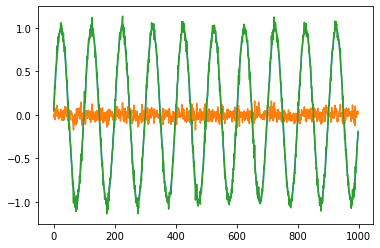

In [3]:
def create_audio(freq = 440, dur = 1.0, srate=44100, amp = 1, phase = 0):
    t = np.linspace(0, dur, int(srate*dur))
    audio = amp*np.sin(2*np.pi*freq*t + phase)
    #ipd.Audio(audio, rate=srate)
    return audio

audio1 = create_audio(amp=1)


noise = np.random.normal(0, 0.05, len(audio1))
signal = audio1 + noise
plt.figure()
plt.plot(audio1[1:1000])
plt.plot(noise[1:1000])
plt.plot(signal[1:1000])

ipd.Audio(signal, rate = 44100)


In [4]:
testcode3 = '''

def fast_dft(x, N):
    X = np.fft.fft(x)
    N = len(x)
    Xmag = 2*np.abs(X)/N
    return Xmag
'''

def test3():
    x = np.zeros(512)
    print (timeit.repeat(stmt=testcode3, repeat=10))

test3()

[0.08053774599999919, 0.0666361559999995, 0.05856491599999991, 0.0577792249999991, 0.0571750729999998, 0.058168178000000736, 0.05649357999999971, 0.0555528840000008, 0.05759411200000031, 0.056139866999998844]


In [5]:
#512*440/44100

(2048,)


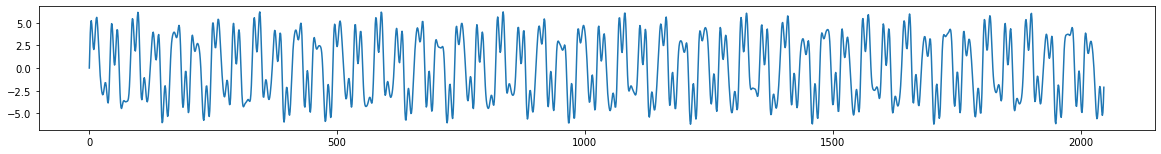

In [8]:
def pedagogical_dft(x, N):
 # array holding the real parts of the spectrum
    Xre = np.zeros(N)
    Xim = np.zeros(N)
 # array holding the imaginary values of the spectru Xim = np.zeros(N)
    for k in np.arange(0,N):
         for n in np.arange(0,N):
   #inner product with real basis k
            Xre[k] += x[n]*np.cos(n*k*2*np.pi/N) 
   #inner product with imaginary basis k
            Xim[k] += x[n]*np.sin(n*k*2*np.pi/N) 
    return (Xre, Xim)

def efficient_dft(x, N):
    
    X_re = np.zeros(N)
    X_im = np.zeros(N)
    for k in np.arange(0,N):
        omega = 2*k*np.pi/N
        for n in np.arange(0,N):
            
            X_re[k] += x[n]*np.cos(n*omega)
            X_im[k] += x[n]*np.sin(n*omega)

    return (X_re, X_im)

def fast_dft(x, N):
    X = np.fft.fft(x)
    N = len(x)
    Xmag = 2*np.abs(X)/N
    return Xmag

N=2048
n = np.arange(0,N)
k=1
x1 = np.sin(50*k*n*np.pi/N) + 4*np.sin(100*k*n*np.pi/N) + 2*np.sin(300*k*n*np.pi/N) + np.sin(384*k*n*np.pi/N)

(a1, b1) = pedagogical_dft(signal, N)
(a2, b2) = efficient_dft(signal, N)
X1 = 2 * np.sqrt(a1*a1 + b1*b1) / N
X2 = 2*np.sqrt(a2*a2 + b2*b2)/N
X3 = fast_dft(signal, N)

plt.figure(figsize = (20,5))
plt.subplot(131)
plt.plot(X1)
plt.subplot(132)
plt.plot(X2)
plt.subplot(133)
plt.plot(X3)

#plt.subplot(211)
#plt.plot(n, x1)

print (a1.shape)

In [18]:
def modified_dft(freq, x, N):
    
    X_re = np.zeros(N)
    X_im = np.zeros(N)
    freqz = np.array(freq)
    omega = (2*np.pi/N) * freqz
    
    for k in np.arange(0,N):
        for n in np.arange(0,N):
            for o in omega:
                
                X_re[k] += x[n]*np.cos(n*k*o)
                X_im[k] += x[n]*np.sin(n*k*o)
        
    return(X_re, X_im)


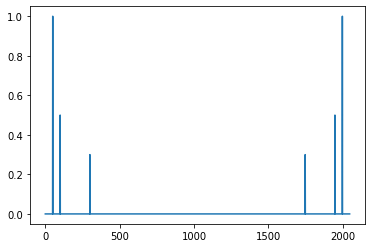

In [11]:
#freqs = np.arange(0,44100)
#lul = np.multiply(freqs,3)
#print (lul)
#(a4,b4) = modified_dft(freqs, signal ,N)
#print (a4.shape)
#X4 = 2*np.sqrt(a4*a4 + b4*b4)/N
#plt.plot(X4)

x2 = np.sin(50*n*2*np.pi/N) + 0.5 * np.sin(100 * n * 2 * np.pi/N) + 0.3 * np.sin(300 * n * 2 * np.pi/N)

(X_re, X_im) = pedagogical_dft(x2, N)
Xmag = 2 * np.sqrt(X_re * X_re + X_im * X_im) / N
Xmag2 = fast_dft(x2, N)
plt.plot(Xmag)

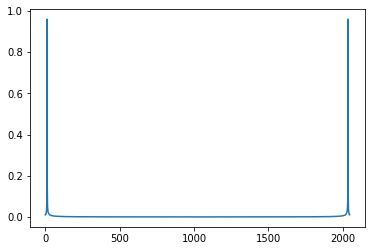

In [12]:
samp_rate = 44100.0

def sinusoid (note = "A4", dur = 1.0, samp_rate = 44100.0, amp = 1.0, phase = 0):
    
    samp_rate=44100
    freq = 0.0
    if note == "A4":
        freq = 440.0
    elif note == "B4":
        freq = 493.88
    elif note == "C4":
        freq = 261.63
    elif note == "D4":
        freq = 293.66
    elif note == "E4":
        freq = 329.63
    elif note == "F4":
        freq = 349.23
    elif note == "G4":
        freq = 392.00
    else:
        print ("Invalid note")
        
    t = np.linspace(0, dur, int(samp_rate*dur))
    data = amp*np.sin(2*np.pi*freq*t + phase)
    
    return data

play1 = sinusoid(note = "C4", dur = 1.0)
ipd.Audio(play1, rate = samp_rate)
      
n1 = sinusoid(note = "C4", dur = 1.0)
n2 = sinusoid(note = "E4", dur = 1.0)
n3 = sinusoid(note = "G4", dur = 1.0)
n4 = sinusoid(note = "F4", dur = 1.0)
n5 = sinusoid(note = "D4", dur = 1.0)
n6 = sinusoid(note = "C4", dur = 1.0)
n7 = sinusoid(note = "A4", dur = 1.0)

melody = np.hstack([n1, n5, n2])
ipd.Audio(melody, rate = samp_rate) 
(X_re_melo, X_im_melo) = pedagogical_dft(melody, N)
X_melo = 2*np.sqrt(X_re_melo*X_re_melo + X_im_melo*X_im_melo)/N
plt.plot(X_melo)
##print(len(melody))

132300


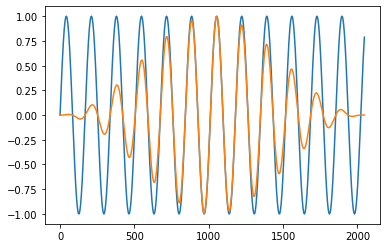

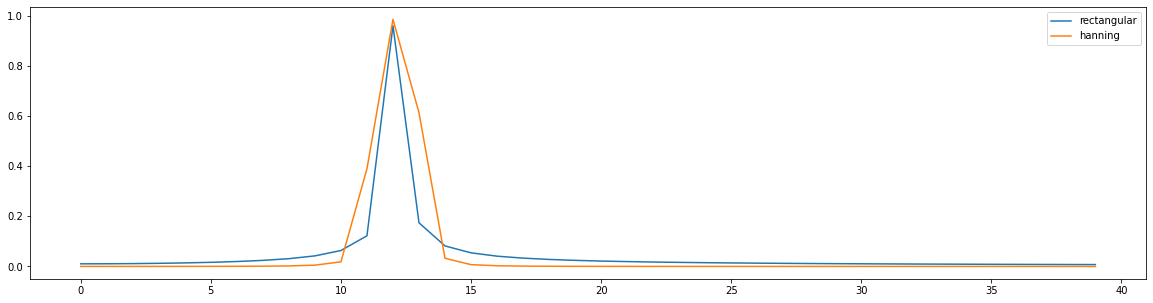

In [13]:
def plot_mag_spectrums(Xmag, wXmag): 
    plt.figure(figsize=(20,5))
    n = np.arange(0,len(Xmag))
    plt.plot(n,Xmag)
    plt.plot(n,wXmag)
    plt.legend(['rectangular', 'hanning'])


window_size = 2048
#zero_pad = np.zeros((len(melody)%window_size))
#melo = np.array(melody)
#total_seg = len(melody)
print(len(melody))
#hop_size = 2048


frame_index = 0

#wXmag = np.zeros(len(melody))
#Xmag = np.zeros(len(melody))
sx = melody[frame_index * window_size : (frame_index+1)*window_size]
wx = np.hanning(len(sx))
wsx = np.multiply(sx,wx)
Xmag = 2 * np.abs(np.fft.fft(sx)) /len(sx)
wXmag = 2 * np.abs(np.fft.fft(wsx)) / len(wsx)
    
    
plt.figure()
plt.plot(sx)
plt.plot(wsx)

plot_mag_spectrums(Xmag[0:40], 2 * wXmag[0:40])

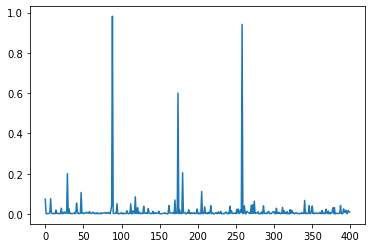

In [19]:
eq_temp = [440.00, 493.88, 261.63, 293.66, 329.63, 349.23, 392.00]

def musicTransform():
    (X_re1, X_im1) = modified_dft(eq_temp, melody, N)
    #(X_re1, X_im1) = modified_dft(melody, N)
    Xmag1 = 2*np.sqrt(X_re1*X_re1 + X_im1*X_im1)/N
    plt.plot(Xmag1[0:400])


musicTransform()

In [20]:
### Doubt
#. Since the audio recording is sampled at Fs = 44100, when I directly take the fft using the in-built function,
#. I am able to see the three peaks corresponding to the notes clearly. However I am confused about how should I take
#. the N point DFT of the audio signal so that I am able to see the 3 peaks clearly. 
#  Also I am a bit new to python so I was not able to use zero padding so that I could process the entire recording 
#. and obtain the magnitude spectrum.

# Please help!!

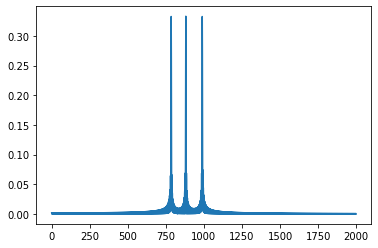

In [26]:
X2 = np.fft.fft(melody)
Xmag2 = 2*np.abs(X2)/len(melody)
plt.plot(Xmag2[0:2000])